In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/Users/jerometam/Desktop/DATABASE/customer-segmentation-dataset/Mall_Customers.csv')

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
def Bar_plt3d(df,xlabel,zlabel,figsize,title):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Positions and bar dimensions
    x_pos = np.arange(len(df))
    y_pos = np.zeros(len(df))
    z_pos = [0] * len(df)
    dx = np.ones(len(df))
    dy = np.ones(len(df))
    dz = df['Nb']

    # Bar colors
    colors = plt.cm.spring(np.linspace(0, 1, len(df)))

    # Creating the bars
    ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors)

    # Setting the labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Y')
    ax.set_zlabel(zlabel)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(df[xlabel])

    plt.title(title)
    plt.show()

def Pie_plt3d(df,xlabel,zlabel,figsize,title):
    # 3D-like Pie Chart
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

    # Data for plotting
    sizes = df[zlabel]
    labels = df[xlabel]
    colors = plt.cm.spring(np.linspace(0, 1, len(df)))
    explode = (0.1, 0)  # explode one slice

    # Create a pie chart
    wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                    autopct='%1.1f%%', shadow=True, startangle=140)

    # Enhance the 3D effect
    for wedge in wedges:
        wedge.set_edgecolor('white')

    ax.set_title(title)
    plt.show()

def bar_plt(df, x,y, fig_size,title):
    plt.figure(figsize=fig_size)
    sns.barplot(x=x,y=y,data=df,palette="Paired")
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def box_plt(df,column,figsize,title,seaborn = False):
    plt.figure(figsize=figsize)
    if seaborn:
        
        sns.boxplot(x=column, data=df, color='skyblue')
        plt.title(title)
        plt.xlabel(column)
        plt.show()
    
    else : 
        df.boxplot(column=column, figsize=figsize)
        plt.title(title)
        plt.ylabel(column)
        plt.show()

def pie_plt(df, x,y, fig_size,title):
    plt.figure(figsize=fig_size)
    plt.pie(x, labels=y, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", len(df)))
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

def Kde_plt(df,column,figsize,title):
    plt.figure(figsize=figsize)
    sns.kdeplot(data=df, x=column, color='skyblue', fill=True)

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.75)  
    plt.show()

def hist_plt(df,xlabel,ylabel,title,figsize,bins = 10,seaborn = False,kde=False):

    plt.figure(figsize=figsize)

    if seaborn:
        counts, bin_edges, _ = plt.hist(df[xlabel], bins=bins, color='skyblue', edgecolor='black', alpha=0.9)


        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        for count, x in zip(counts, bin_centers):
            plt.text(x, count, int(count), ha='center', va='bottom')

        
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.grid(axis='y', alpha=0.75)  
        plt.show()

    
    else : 
        ax = sns.histplot(data=df, x=xlabel, bins=bins, color='skyblue', kde=kde)

        
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, 
                    f'{int(height)}', ha='center', va='bottom')

        plt.title('Histogram of Age Distribution with Counts')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.grid(axis='y', alpha=0.75)  
        plt.show()

def get_stat(df,column):
    print(df[column].describe())

In [6]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Nb']


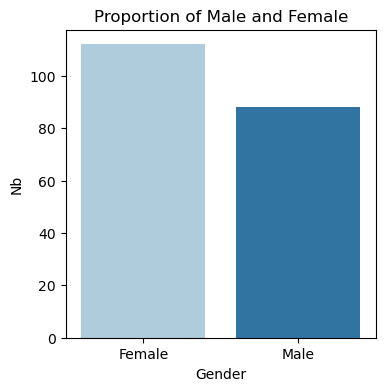

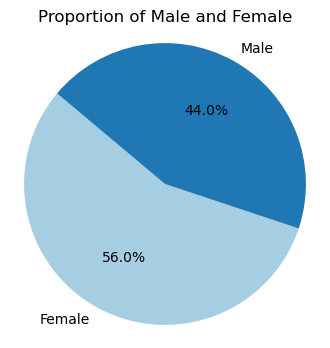

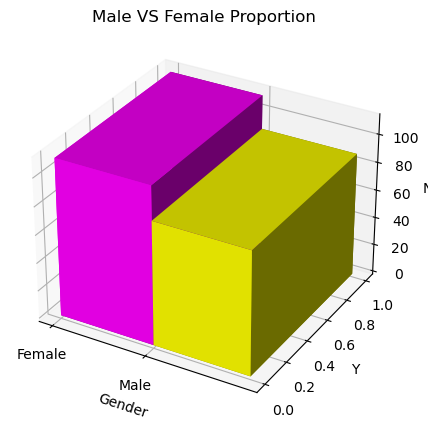

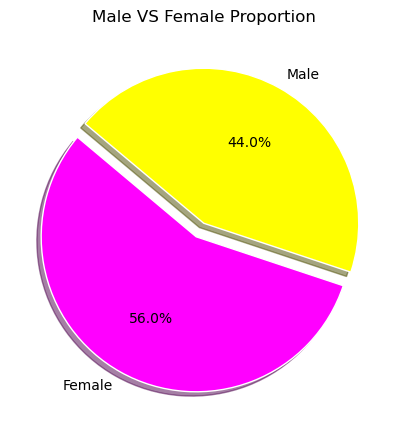

In [7]:
bar_plt(gender_counts, gender_counts.columns[0],gender_counts.columns[1], (4,4),'Proportion of Male and Female')
pie_plt(gender_counts, gender_counts['Nb'],gender_counts['Gender'], (4,4),'Proportion of Male and Female')
Bar_plt3d(gender_counts,gender_counts.columns[0],gender_counts.columns[1],(5,6),'Male VS Female Proportion')
Pie_plt3d(gender_counts,gender_counts.columns[0],gender_counts.columns[1],(5,6),'Male VS Female Proportion')


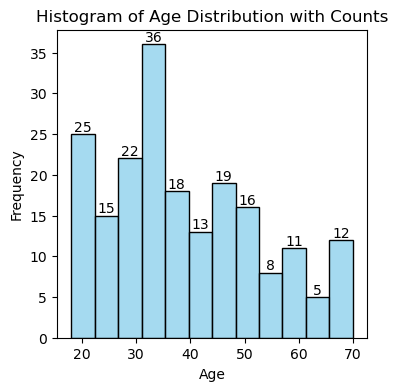

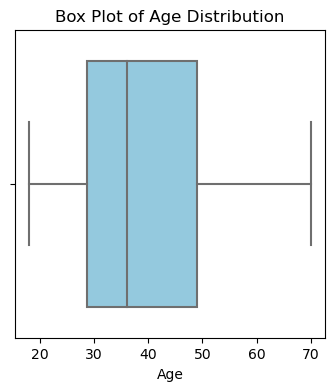

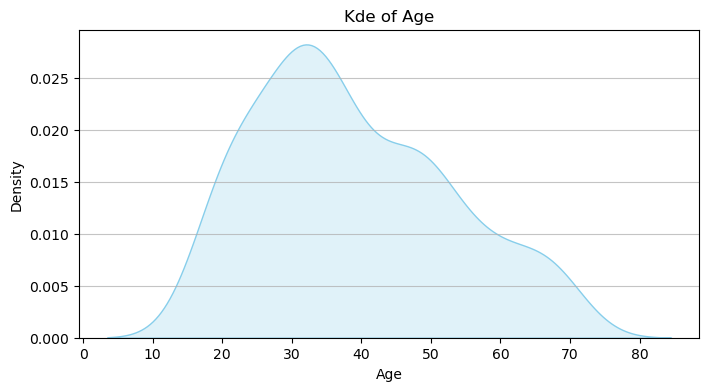

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [8]:
hist_plt(df,'Age','Frequency','Histogram of Age Distribution with Counts',(4,4),bins = 12,seaborn=False)
box_plt(df,'Age',(4,4),'Box Plot of Age Distribution',seaborn=True)
Kde_plt(df,'Age',(8,4),'Kde of Age')
get_stat(df,'Age')

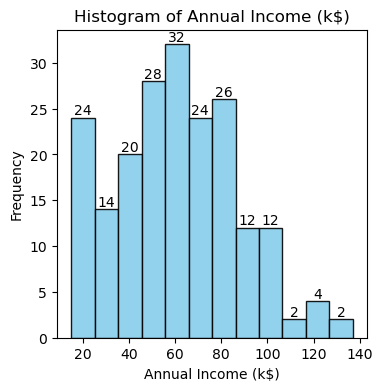

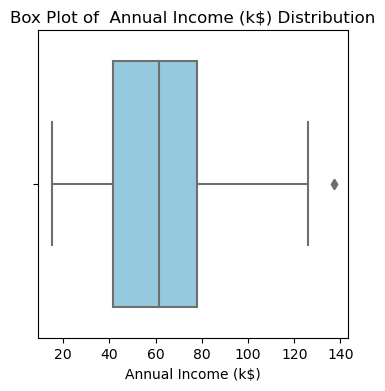

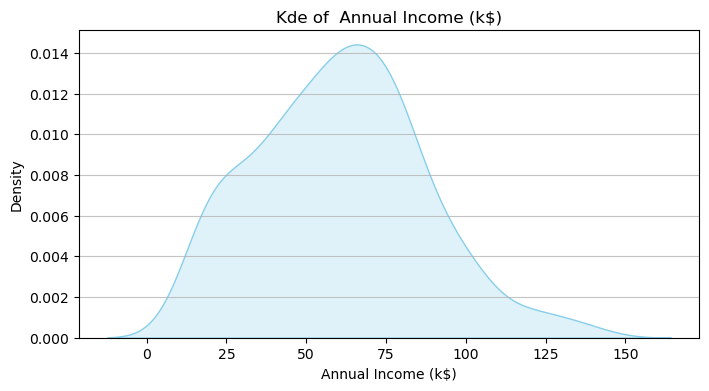

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


In [9]:
hist_plt(df,'Annual Income (k$)','Frequency','Histogram of Annual Income (k$)',(4,4),bins = 12,seaborn=True)
box_plt(df,'Annual Income (k$)',(4,4),'Box Plot of  Annual Income (k$) Distribution',seaborn=True)
Kde_plt(df, 'Annual Income (k$)',(8,4),'Kde of  Annual Income (k$)')
get_stat(df,'Annual Income (k$)')

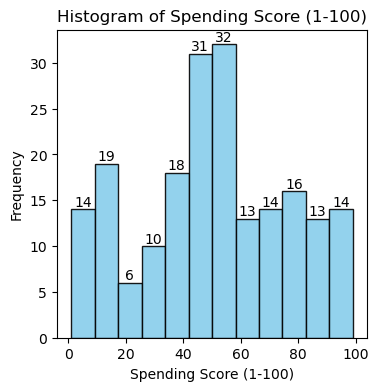

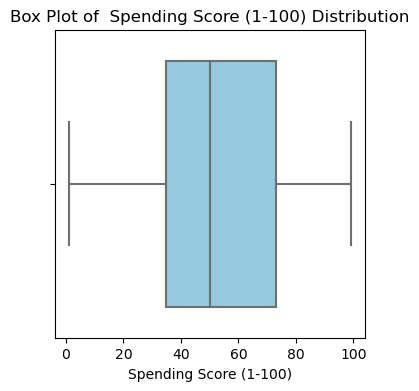

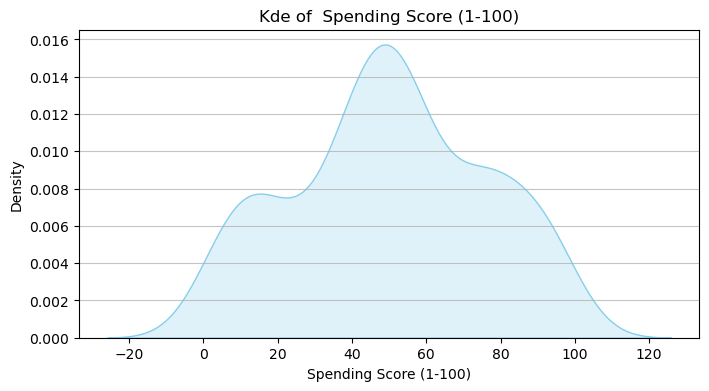

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


In [10]:
hist_plt(df,'Spending Score (1-100)','Frequency','Histogram of Spending Score (1-100)',(4,4),bins = 12,seaborn=True)
box_plt(df,'Spending Score (1-100)',(4,4),'Box Plot of  Spending Score (1-100) Distribution',seaborn=True)
Kde_plt(df, 'Spending Score (1-100)',(8,4),'Kde of  Spending Score (1-100)')
get_stat(df,'Spending Score (1-100)')

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [13]:
tmp = pd.get_dummies(df, columns=['Gender'])


In [78]:
tmp = tmp.drop(columns='CustomerID')

In [79]:
tmp

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [80]:
S_scaler = StandardScaler()
M_m_scaler = MinMaxScaler()
M_a_scaler = MaxAbsScaler()

In [81]:
s_data = S_scaler.fit_transform(tmp)
M_m_data = M_m_scaler.fit_transform(tmp)
M_a_data = M_a_scaler.fit_transform(tmp)


In [82]:
def Elbow(scaled_data,max_cluster,title,figsize):
    inertia = []
    k_range = range(1, max_cluster +1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(k_range, inertia, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

def Silhouette(scaled_data, max_clusters,title,figsize):

    silhouette_scores = []
    k_range = range(2, max_clusters + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(scaled_data)
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=figsize)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    return silhouette_scores

# Example usage:

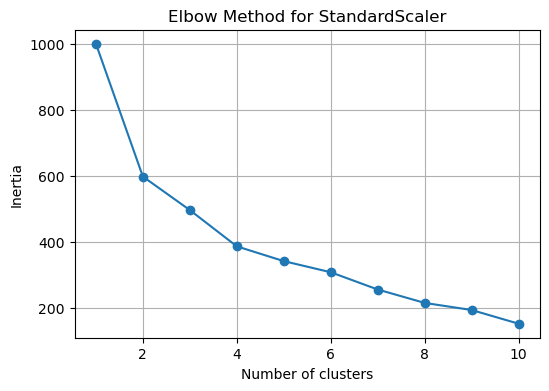

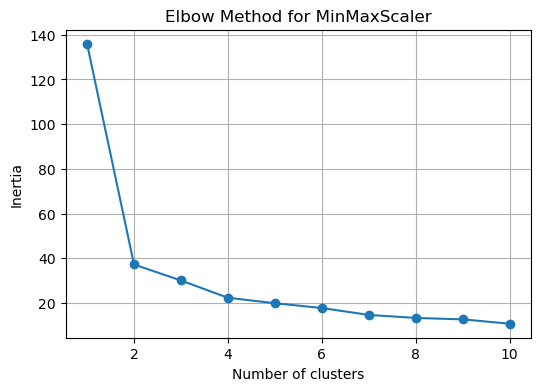

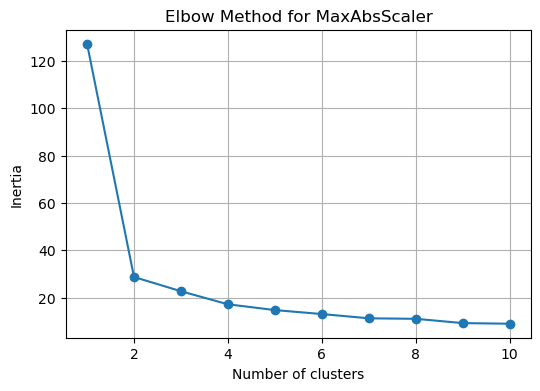

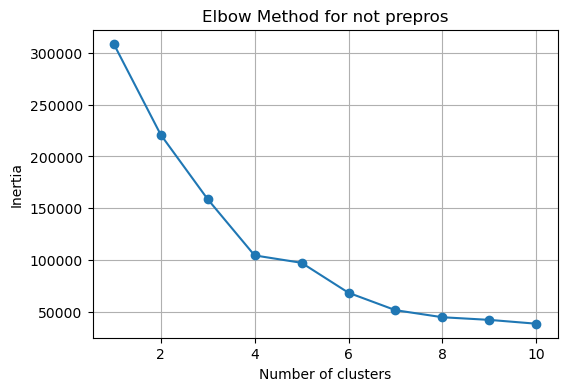

In [83]:
Elbow(s_data,10,'Elbow Method for StandardScaler',(6,4))
Elbow(M_m_data,10,'Elbow Method for MinMaxScaler',(6,4))
Elbow(M_a_data,10,'Elbow Method for MaxAbsScaler',(6,4))
Elbow(tmp,10,'Elbow Method for not prepros',(6,4))

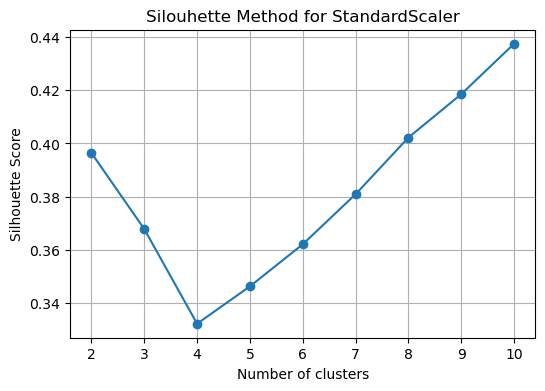

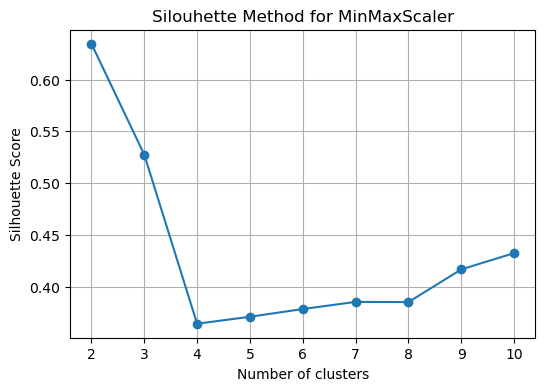

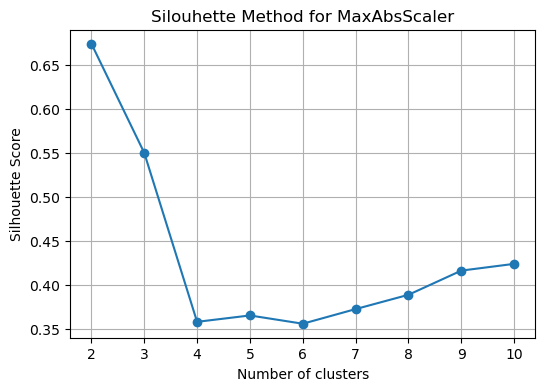

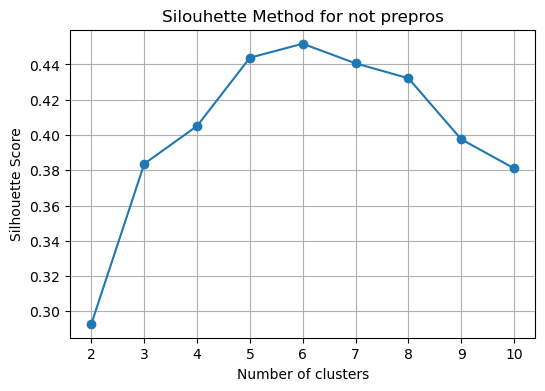

In [84]:
s_scores_S_S = Silhouette(s_data,10,'Silouhette Method for StandardScaler',(6,4))
s_scores_M_m =Silhouette(M_m_data, 10,'Silouhette Method for MinMaxScaler',(6,4))
s_scores_M_a =Silhouette(M_a_data, 10,'Silouhette Method for MaxAbsScaler',(6,4))
s_scores_n_p =Silhouette(tmp, 10,'Silouhette Method for not prepros',(6,4))

In [85]:
print(f'The optimal number of clusters for StandardScaler is: {np.argmax(s_scores_S_S) + 2 }')
print(f'The optimal number of clusters for MinMaxScaler is: {np.argmax(s_scores_M_m) + 2 }')
print(f'The optimal number of clusters for MaxAbsScaler is: {np.argmax(s_scores_M_a) + 2 }')
print(f'The optimal number of clusters for not prepross is: {np.argmax(s_scores_n_p) + 2 }')


The optimal number of clusters for StandardScaler is: 10
The optimal number of clusters for MinMaxScaler is: 2
The optimal number of clusters for MaxAbsScaler is: 2
The optimal number of clusters for not prepross is: 6


In [93]:
def Kmeans_(data,optimal_clusters):
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    kmeans.fit(data)
    return kmeans

In [94]:
kmeans_s = Kmeans_(s_data,4)
kmeans_M_m =Kmeans_(M_m_data,2)
kmeans_M_a =Kmeans_(M_a_data,2)
Kmeans_not_prepro = Kmeans_(tmp,6)

df['Cluster_s'] = kmeans_s.labels_
df['Cluster_M_m'] = kmeans_M_m.labels_
df['Cluster_M_a'] = kmeans_M_a.labels_
df['Cluster_not_prepro'] = Kmeans_not_prepro.labels_

In [95]:
#pca = PCA(n_components=2)
#pca_result = pca.fit_transform(s_data)
#df['PCA1_s'] = pca_result[:, 0]
#df['PCA2_s'] = pca_result[:, 1]

In [96]:
def Kmeans_plt(df,x,y,hue,title):
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis')
    plt.title(title)
    plt.show()

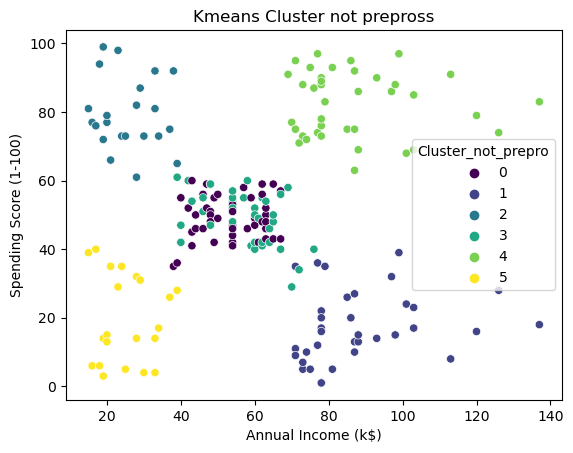

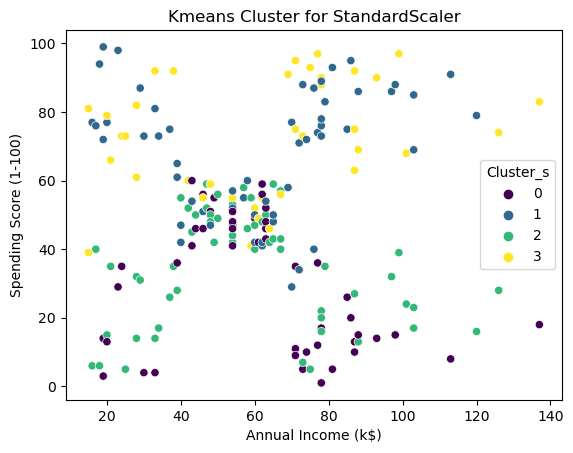

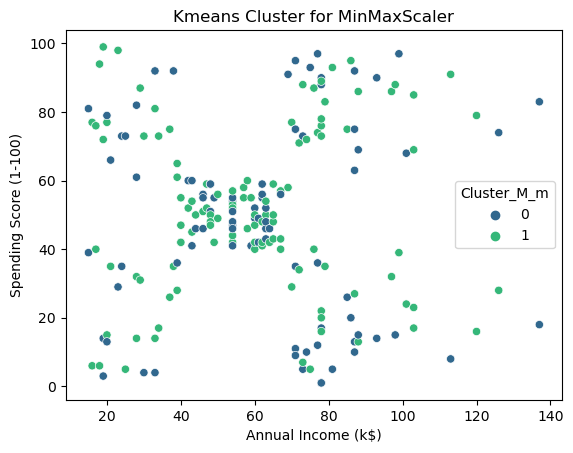

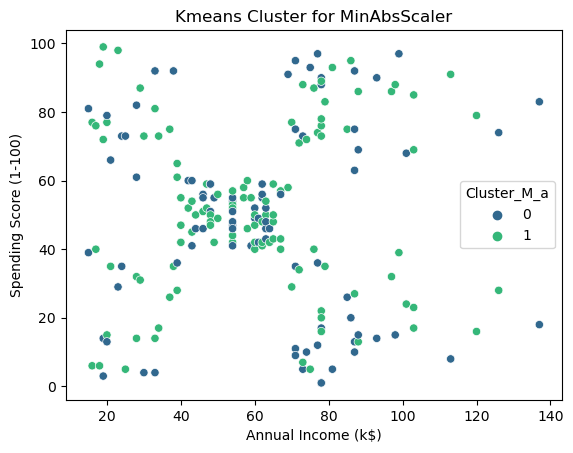

In [97]:
Kmeans_plt(df,'Annual Income (k$)','Spending Score (1-100)','Cluster_not_prepro','Kmeans Cluster not prepross')
Kmeans_plt(df,'Annual Income (k$)','Spending Score (1-100)','Cluster_s','Kmeans Cluster for StandardScaler')
Kmeans_plt(df,'Annual Income (k$)','Spending Score (1-100)','Cluster_M_m','Kmeans Cluster for MinMaxScaler')
Kmeans_plt(df,'Annual Income (k$)','Spending Score (1-100)','Cluster_M_a','Kmeans Cluster for MinAbsScaler')

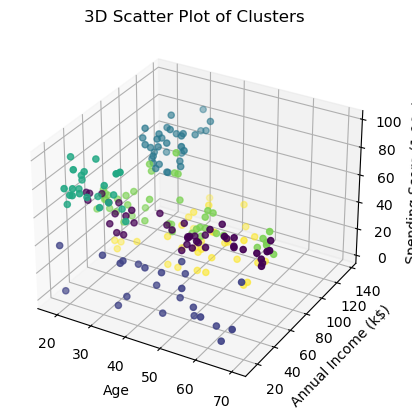

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'], c=df['Cluster_not_prepro_elbow'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Scatter Plot of Clusters')
plt.show()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

5
